In [12]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

# 이미지 불러오기
src = cv2.imread("2.png")

if src is None :
    pritn("Image load failed ! ")
    sys.exit()
    
# 사각형 지정을 통한 초기 분할
rc = cv2.selectROI(src)
mask = np.zeros(src.shape[:2], np.uint8)

bgdModel = None
fgdModel = None
iterCount = 5
cv2.grabCut(src, mask, rc, bgdModel, fgdModel, iterCount, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask ==0) | (mask == 2), 0, 1).astype('uint8')
dst = src*mask2[:,:,np.newaxis]

mask = mask*64

cv2.imshow('mask',mask)
cv2.imshow('dst',dst)
cv2.waitKey()

cv2.destroyAllWindows()

-1

In [6]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

image = cv2.imread("2.png")
print(image.shape)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# height width 통합
image = image.reshape((image.shape[0] * image.shape[1], 3))
print(image.shape)

k = 5
clt = KMeans(n_clusters = k)
clt.fit(image)

for center in clt.cluster_centers_ : 
    print(center)

(598, 601, 3)
(359398, 3)
[183.66041225 205.90511737 230.71169396]
[15.79922238 26.79308329 46.52159889]
[118.35382658 127.78430398 142.08873998]
[146.36460717 179.0050993  214.92941492]
[68.76040838 80.41948417 87.2068042 ]


In [8]:
def centroid_histogram(clt) :
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist,_) = np.histogram(clt.labels_, bins = numLabels)
    
    hist = hist.astype("float")
    hist /= hist.sum()
    
    return hist

hist = centroid_histogram(clt)
print(hist)

[0.2076834  0.28553303 0.13973088 0.19584416 0.17120852]


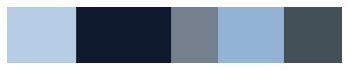

In [11]:
def plot_colors(hist, centroids) :
    bar = np.zeros((50, 300, 3), dtype = 'uint8')
    startX = 0
    
    for (percent, color) in zip(hist,centroids) :
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                     color.astype("uint8").tolist(), -1)
        startX = endX
        
    return bar

bar = plot_colors(hist, clt.cluster_centers_)

plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [23]:
from sklearn.cluster import KMeans

In [31]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

In [96]:
img = cv2.imread("1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
dim = (500, 300)
# resize image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

In [97]:
clt = KMeans(n_clusters = 3)
clt.fit(image.reshape(-1,3)) # R B G로 변환

KMeans(n_clusters=3)

In [98]:
clt.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [99]:
clt.cluster_centers_

array([[ 22.58065029,  33.74826766,  51.10079   ],
       [164.87080498, 191.54781072, 221.28363213],
       [ 98.51883277, 109.07197275, 119.97032088]])

In [100]:
def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

{0: 0.98, 1: 0.02, 2: 0.0}
[[254.81475507 254.82753899 254.83918416]
 [210.17670157 210.57024433 211.44938918]
 [ 88.91061453 119.83798883 218.65921788]]
   percent  rgb_hex
0     0.98  #fefefe
1     0.02  #d2d2d3
2     0.00  #5877da


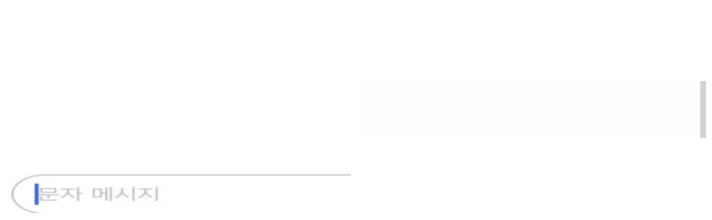

In [101]:
from collections import Counter
import pandas as pd

def rgb_to_hex(r, g, b) :
    r,g,b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)

def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    rgb_hex = []
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))
    
    #for logging purposes
    print(perc)
    print(k_cluster.cluster_centers_)
    for k in k_cluster.cluster_centers_ :
        r = k[0]
        g = k[1]
        b = k[2]
        rgb_hex.append(rgb_to_hex(r,g,b))
        
    rgb_hex_percent_df = pd.DataFrame.from_dict(perc, orient='index') # color rate 열 추가
                                                                      # dic -.> dataframe
    rgb_hex_percent_df['rgb_hex'] = rgb_hex # rgb_hex 열 추가
    rgb_hex_percent_df.columns = ["percent","rgb_hex"] # column name 변경
    print(rgb_hex_percent_df)
    step = 0
    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
        
    return palette

clt_1 = clt.fit(img.reshape(-1, 3))
show_img_compar(img, palette_perc(clt_1))

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([ 9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5]),
 <BarContainer object of 10 artists>)

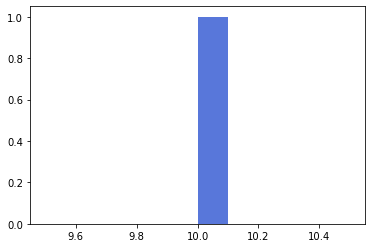

In [103]:
data = [10]
plt.hist(data,color = '#5877da')